In [15]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
from pgmpy.factors.discrete import TabularCPD
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 나이브 베이즈

$$
P(y = C_k \mid x) \;\; \propto \;\; \prod_{i=1}^n P(x_{i} \mid y = C_k)\; P(y = C_k)
$$

- 정의 : __타겟변수 Y의 각 클래스 {C1,C2,C3...Ck}에 대한 독립변수 x의 조건부 확률 분포 정보인 P(x|y = Ck)를 추정한 후 가장 조건부 확률이 큰 클래스 k를 선택하는 방법이다.__
- 가정 : Assume that all features are independent given the class label 𝒀: Conditional Independence.
    - 만약 변수간 상관관계가 높다면 쓰기힘들것 같다
- 장점
    - 나이브 베이즈는 트레이닝 데이터 량이 적을때, 좋은 퍼포먼스를 낸다.(적은지 어떻게 판단할 것인가?) 
- 단점
    - 예측변수의 범주가 학습용 데이터에서 존재하지 않는 경우 나이브 베이즈는 이러 한 예측변수의 범주를 갖는 새로운 레코드는 0의 확률값을 갖는다고 가정한다.(Smoothing 으로 커버가능)

### 파이썬 구현

- BernoulliNB: 베르누이 분포 나이브 베이즈
- MultinomialNB: 다항 분포 나이브 베이즈
- GaussianNB: 가우시안 정규 분포 나이브 베이즈

#### Numerical
- GaussianNB
    - 연속적인 어떤 데이터에 주로 사용됨
    - GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장합니다.
    - GaussianNB는 대부분 매우 고차원인 데이터셋에 사용된다
    - 추정파라미터 : $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

#### Categorical
- BernoulliNB 
    - 이진 데이터에 사용됨, 베르누이 나이브 베이즈 모형에서는 타겟 변수뿐 아니라 독립 변수도 0 또는 1의 값을 가져야 한다. 
- MultinomialNB 
    - 카운트 데이터에 사용됨
    - MultinomialNB는 클래스별로 특성의 평균을 계산함    
- 공통점
    - MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있습니다. alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가합니다. 이는 통계 데이터를 완만하게 만들어줍니다. alpha가 크면 더 완만해지고 모델의 복잡도는 낮아집니다. alpha에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않습니다. 그러나 이 값을 조정하면 어느 정도는 정확도를 높일 수 있습니다.
- 차이점
    - 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용합니다. MultinomialNB는 보통 0이 아닌 특성이 비교적 많은 데이터셋(예를 들어 큰 문서들)에서 BernoulliNB보다 성능이 높습니다.

#### 사전확률 파라미터 
- classes : 타겟 Y의 클래스(라벨)
- class_count : 타겟 Y의 값이 특정한 클래스인 표본 데이터의 수
- class_prior : 타겟 Y의 무조건부 확률 분포  P(Y)  (가우시안 정규 분포의 경우에만)
- class_log_prior : 타겟 Y의 무조건부 확률 분포의 로그  logP(Y)  (베르누이 분포나 다항 분포의 경우에만)

#### Likelihood 추정속성
- theta, sigma : 가우시안 정규 분포의 기댓값  μ  과 분산  σ2  (가우시안 정규 분포의 경우에만)
- feature_count : 베르누이 분포 혹은 다항 분포의 각 독립변수값이 나타난 횟수 (베르누이 분포나 다항 분포의 경우에만)
- feature_log_prob : 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그 (베르누이 분포나 다항 분포의 경우에만)

- sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

    - alpha : float, optional (default=1.0)
      <br/> Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing)
    - fit_prior : boolean, optional (default=True)
      <br/> Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
    - class_prior : array-like, size (n_classes,), optional (default=None)
      <br/> Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
    - class_log_prior_ : array, shape = [n_classes]
      <br/> Log probability of each class (smoothed).
    - feature_log_prob_ : array, shape = [n_classes, n_features] 
      <br/> Empirical log probability of features given a class, P(x_i|y).
    - class_count_ : array, shape = [n_classes]
      <br/> Number of samples encountered for each class during fitting. This value is weighted by the sample weight when provided.
    - feature_count_ : array, shape = [n_classes, n_features]
      <br/> Number of samples encountered for each (class, feature) during fitting. This value is weighted by the sample weight when provided.

In [54]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print (iris.data.shape[0],(iris.target != y_pred).sum())

150 6


In [17]:
np.random.seed(0)
rv0 = sp.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

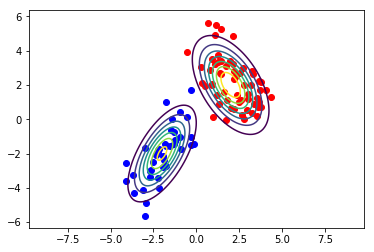

In [19]:
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])))
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])))
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [35]:
print(len(X),X[:10])

100 [[-3.65937565 -4.27892515]
 [-4.11410669 -2.56217408]
 [-2.92859796 -4.89992211]
 [-2.67683553 -3.35500055]
 [-2.1594698  -1.71569175]
 [-2.9758651  -1.6916096 ]
 [-2.68575484 -3.00088628]
 [-2.55525458 -2.49237272]
 [-3.08379595 -4.11940095]
 [-1.7476167  -2.72622503]]


In [40]:
print(len(y),y)

100 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [20]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [41]:
# Y variable의 숫자를 셀수 있음
model_norm.classes_

array([ 0.,  1.])

In [42]:
# Y variable의 클래스 갯수를
model_norm.class_count_

array([ 40.,  60.])

In [43]:
# Y lable 의 사전확률
model_norm.class_prior_

array([ 0.4,  0.6])

In [24]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([ 1.02398854,  2.31390497]))

In [25]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([ 2.19130701,  2.12626716]), array([ 1.25429371,  1.93742544]))

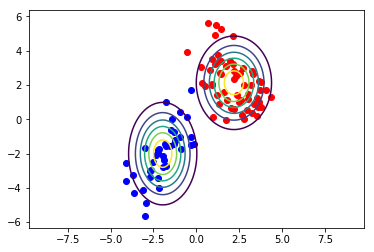

In [27]:
rv0 = sp.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])))
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])))
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

## Ex1)
제약사에서 환자가 특정한 병에 걸린지 확인할 수 있는 시약을 만들었다. 그 병에 걸린 환자에게 시약을 테스트한 결과 99%의 확률로 양성 반응을 보였다. 병에 걸린지 확인이 되지 않은 어떤 환자가 이 시약을 테스트한 결과 양성 반응을 보였다면 이 환자가 그 병에 걸려 있을 확률은 얼마인가? 

- 실제로 병에 걸린 경우를 사건 : D
- 실제로 병에 안걸린 경우를 사건 : D^C
- 테스트 양성 반응 : S
- 테스트 음성 반응 : S^C

Conditional
<br/>
- 실제로 병에 걸렸을 때, 시약이 양성 : P(S|D)
- 시약이 양성일 때, 실제 병에 걸림 : P(D|S)

Question
<br/>
P(S|D)=0.99 가 주어졌을 때, P(D|S)를 구하라

### pgmpy 패키지에서는 조건부 확률을 정의할 수 있는 TabularCPD 클래스<br/><br/>베이즈 정리를 적용할 수 있는 BayesianModel 클래스를 제공한다.

TabularCPD(variable, variable_card, value, evidence, evidence_card)

- variable : 확률변수의 이름 문자열
- variable_card : 확률변수가 가질 수 있는 경우의 수
- value : 조건부 확률 배열, 하나의 열이 하나의 조건을 뜻하므로 하나의 열의 확률 합은 1이어야 한다. 
- evidence: 조건이 되는 확률 변수의 이름 문자열 리스트
- evidence_card : 조건이 되는 확률 변수가 가질 수 있는 경우의 수의 리스트


우선 확률 변수 X를 이용하여 병에 걸렸을 확률  P(D)=P(X=1) , 병에 걸리지 않았을 확률  P(D^C)=P(X=0) 를 정의한다.

In [2]:
cpd_X = TabularCPD('X',2,[[1-0.002,0.002]])
print(cpd_X)

╒═════╤═══════╕
│ X_0 │ 0.998 │
├─────┼───────┤
│ X_1 │ 0.002 │
╘═════╧═══════╛


다음으로 확률 변수 Y를 이용하여 양성 반응이 나올 확률  P(S)=P(Y=1) , 음성 반응이 나올 확률  P(SC)=P(Y=0) 를 정의한다. 이 확률은 병에 걸렸는가 걸리지 않았는가에 따라 달라지므로 다음처럼 조건부로 정의한다.

In [3]:
cpd_YX = TabularCPD('Y',2,np.array([[0.95,0.01],[0.05,0.99]]),evidence=['X'],evidence_card=[2])
print(cpd_YX)

╒═════╤══════╤══════╕
│ X   │ X_0  │ X_1  │
├─────┼──────┼──────┤
│ Y_0 │ 0.95 │ 0.01 │
├─────┼──────┼──────┤
│ Y_1 │ 0.05 │ 0.99 │
╘═════╧══════╧══════╛


조건부 확률과 조건이 되는 확률을 결합하기 위해서는 bayesianModel 클래스 객체를 만들고 add_cpds 메서드로 위에서 구현한 조건부 확률을 추가한다. check_model메서드로 모형이 완전한지 볼 수 있다.

In [4]:
from pgmpy.models import BayesianModel

model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd_YX)
model.check_model()

True

In [5]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(['X'], evidence={'Y': 1})
print(posterior['X'])

╒═════╤══════════╕
│ X   │   phi(X) │
╞═════╪══════════╡
│ X_0 │   0.9618 │
├─────┼──────────┤
│ X_1 │   0.0382 │
╘═════╧══════════╛


## ex2) 과일생성문제

어떤 과일 가게에서 사과와 오렌지를 팔고 있다. 사과와 오렌지는 Red 농장과 Blue 농장에서 공급받는다.

어느날 Red 농장에서 붉은 상자에 사과 2개, 오렌지 6개를 담아서 보냈다. Blue 농장에서는 푸른 상자에 사과가 3, 오렌지가 1개를 담아서 공급했다.

이 과일을 받은 과일 가게 주인은 이 과일들을 모두 상자에서 꺼내어 늘어놓고 판매를 시작하였다. 이 때 어떤 손님이 와서 오렌지를 하나 선택했다( X=  오렌지). 이 오렌지는 Red 농장에서 온 것일까( Y= Red), 아니면 Blue 농장에서 온 것일까( Y= Blue)? 만약 Red 농장과 Blue 농장 중 하나의 답을 정해야 한다면 여러분은 어느 농장을 선택하겠는가?

In [6]:
cpd_Y = TabularCPD('Y',2,[[8/12,4/12]])
print(cpd_Y)

╒═════╤══════════╕
│ Y_0 │ 0.666667 │
├─────┼──────────┤
│ Y_1 │ 0.333333 │
╘═════╧══════════╛


In [7]:
cpd_XY = TabularCPD('X',2,np.array([[6/8,1/4],[2/8,3/4]]),evidence=['Y'],evidence_card=[2])
print(cpd_XY)

╒═════╤══════╤══════╕
│ Y   │ Y_0  │ Y_1  │
├─────┼──────┼──────┤
│ X_0 │ 0.75 │ 0.25 │
├─────┼──────┼──────┤
│ X_1 │ 0.25 │ 0.75 │
╘═════╧══════╧══════╛


In [8]:
from pgmpy.models import BayesianModel

model = BayesianModel([('Y', 'X')])
model.add_cpds(cpd_Y, cpd_XY)
model.check_model()

True

In [9]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(['Y'], evidence={'X': 0})
print(posterior['Y'])

╒═════╤══════════╕
│ Y   │   phi(Y) │
╞═════╪══════════╡
│ Y_0 │   0.8571 │
├─────┼──────────┤
│ Y_1 │   0.1429 │
╘═════╧══════════╛
